## Importing libraries

In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data Collection and Processing

In [411]:
car_dataset = pd.read_csv('car data.csv')

In [412]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [413]:
car_dataset.shape

(301, 9)

In [414]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [415]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [416]:
car_dataset.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [417]:
car_dataset.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [418]:
car_dataset.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

## Encoding Categorical Data

In [420]:
car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)

C:\Users\minam\AppData\Local\Temp\ipykernel_2088\3319278377.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
C:\Users\minam\AppData\Local\Temp\ipykernel_2088\3319278377.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)
C:\Users\minam\AppData\Local\Temp\ipykernel_2088\3319278377.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

In [421]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## splitting to train test splits

In [423]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [424]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Model Training

### Linear Regression

In [427]:
lr_model = LinearRegression()

In [428]:
lr_model.fit(X_train, Y_train)

LinearRegression()

### Evaluation

In [430]:
training_data_prediction = lr_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.883566210027452


In [431]:
test_data_prediction = lr_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.7830188357968033


### Visualization

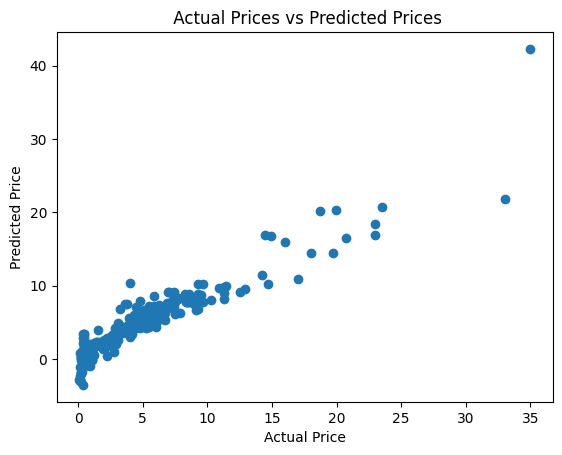

In [433]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(' Actual Prices vs Predicted Prices')
plt.show()

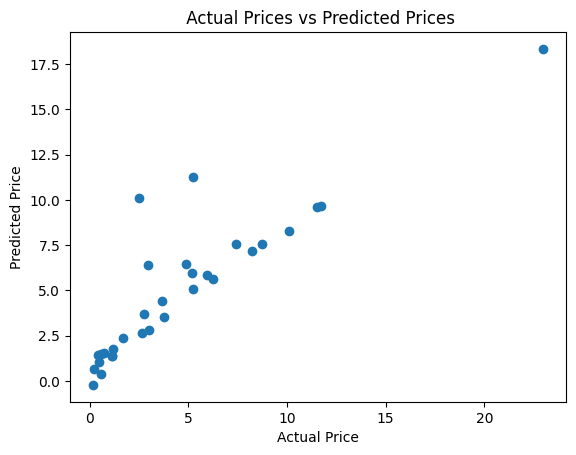

In [434]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(' Actual Prices vs Predicted Prices')
plt.show()

### Lasso Regression

In [436]:
lassor_model = Lasso()

In [437]:
lassor_model.fit(X_train, Y_train)

Lasso()

### Evaluation

In [439]:
training_data_prediction = lassor_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.8514497093339614


In [440]:
test_data_prediction = lassor_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared Error :', error_score)

R squared Error : 0.7381974630054965


### Visualization

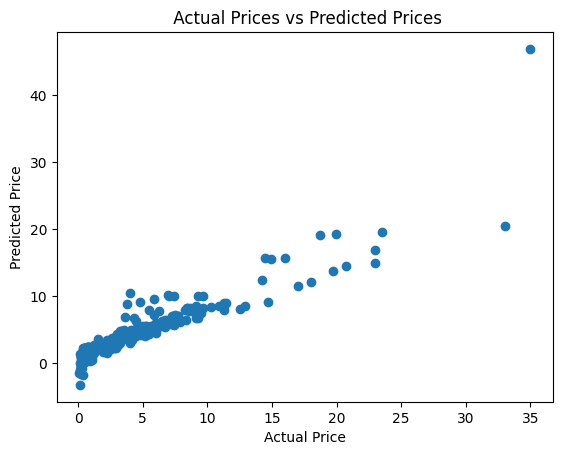

In [442]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(' Actual Prices vs Predicted Prices')
plt.show()

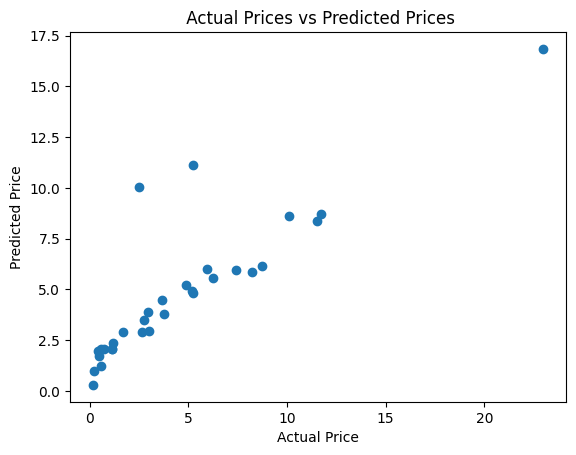

In [443]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(' Actual Prices vs Predicted Prices')
plt.show()